In [1]:
import pandas as pd

In [3]:
original_formula = pd.read_parquet('/red/roitberg/nick_analysis/Restart/22.8M_atoms/quench_analysis/combined_415_original_formula.pq')
quenched_formula = pd.read_parquet('/red/roitberg/nick_analysis/Restart/22.8M_atoms/quench_analysis/combined_415_quenched_formula.pq')
original_molecule = pd.read_parquet('/red/roitberg/nick_analysis/Restart/22.8M_atoms/quench_analysis/combined_415_original_molecule.pq')
quenched_molecule = pd.read_parquet('/red/roitberg/nick_analysis/Restart/22.8M_atoms/quench_analysis/combined_415_quenched_molecule.pq')

In [8]:
print(original_molecule)
print(len(original_molecule['frame'].unique()))

       frame  formula flatten_formula       smiles     name  \
0     224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
1     224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
2     224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
3     224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
4     224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
...      ...      ...             ...          ...      ...   
7291  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7292  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7293  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7294  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
7295  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   

                                           atom_indices  
0     [353544, 1145124, 4559774, 5346574, 6559748, 8...  
1     [3091795, 4883584, 6693908, 9467811, 9511606, ...  
2     [624761, 1620658, 1925826, 3642599, 6411730, 8...  
3     [1274

In [9]:
print(quenched_molecule)
print(len(quenched_molecule['frame'].unique()))

        frame  formula flatten_formula       smiles     name  \
0      224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
1      224713  C3H7NO2   CCCHHHHHHHNOO  CC(C(=O)O)N  Alanine   
2      224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
3      224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
4      224713  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
...       ...      ...             ...          ...      ...   
12425  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12426  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12427  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12428  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   
12429  100287  C2H5NO2      CCHHHHHNOO   C(C(=O)O)N  Glycine   

                                            atom_indices  
0      [431696, 2972081, 3725516, 5842740, 6476561, 6...  
1      [353544, 1145124, 4559774, 5346574, 6559748, 8...  
2      [856989, 4601145, 7589286, 8732939, 9458625, 1.

In [23]:
quenched_molecule['name'].unique()

array(['Alanine', 'Glycine', 'Aspartic Acid', 'Serine', 'Cytosine',
       'Valine', 'Leucine', 'Asparagine', 'Uracil', 'Threonine',
       'Thymine'], dtype=object)

In [25]:
original_frames = set(original_molecule['frame'].unique())
quenched_frames = set(quenched_molecule['frame'].unique())

missing_frames = original_frames - quenched_frames

filtered_original_molecule = original_molecule[~original_molecule['frame'].isin(missing_frames)]

print(f"Missing frames: {missing_frames}")
print(f"Number of rows after dropping missing frames: {len(filtered_original_molecule)}")


Missing frames: {268953, 283380, 165724}
Number of rows after dropping missing frames: 7235


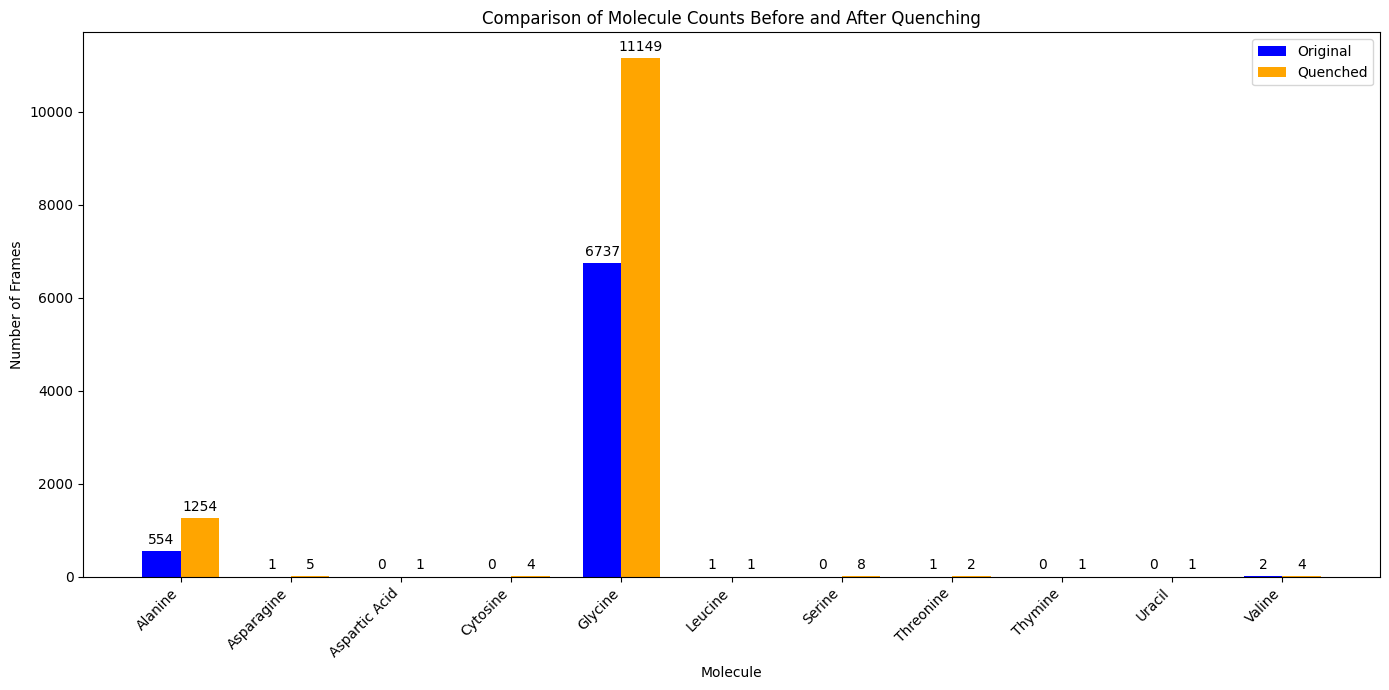

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

counts_original = original_molecule.groupby('name').size()
counts_quenched = quenched_molecule.groupby('name').size()

# Align both series (counts_original, counts_quenched) to ensure both have the same index
counts_combined = pd.DataFrame({
    'Original': counts_original,
    'Quenched': counts_quenched
}).fillna(0)  # Fill missing values with 0 in case some molecules are only in one of the datasets

molecules = counts_combined.index
counts_original = counts_combined['Original']
counts_quenched = counts_combined['Quenched']

x = np.arange(len(molecules))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

bars1 = ax.bar(x - bar_width/2, counts_original, bar_width, label='Original', color='blue')
bars2 = ax.bar(x + bar_width/2, counts_quenched, bar_width, label='Quenched', color='orange')

ax.set_xlabel('Molecule')
ax.set_ylabel('Number of Frames')
ax.set_title('Comparison of Molecule Counts Before and After Quenching')
ax.set_xticks(x)
ax.set_xticklabels(molecules, rotation=45, ha="right")
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',  # Convert height to integer for cleaner display
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()


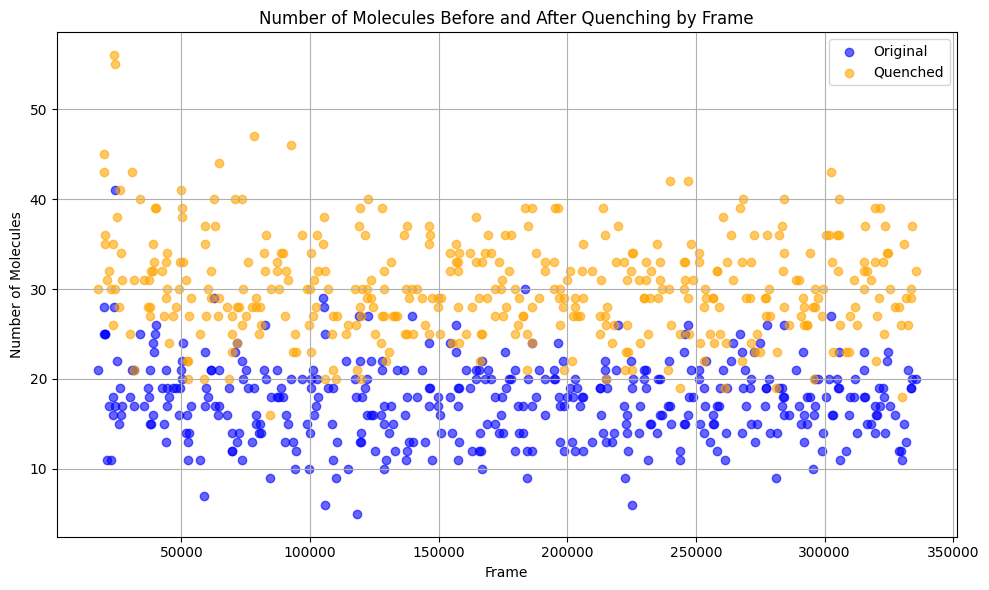

In [27]:
import matplotlib.pyplot as plt

original_frame_counts = original_molecule.groupby('frame').size()
quenched_frame_counts = quenched_molecule.groupby('frame').size()

plt.figure(figsize=(10, 6))

plt.scatter(original_frame_counts.index, original_frame_counts.values, color='blue', label='Original', alpha=0.6)
plt.scatter(quenched_frame_counts.index, quenched_frame_counts.values, color='orange', label='Quenched', alpha=0.6)

plt.xlabel('Frame')
plt.ylabel('Number of Molecules')
plt.title('Number of Molecules Before and After Quenching by Frame')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


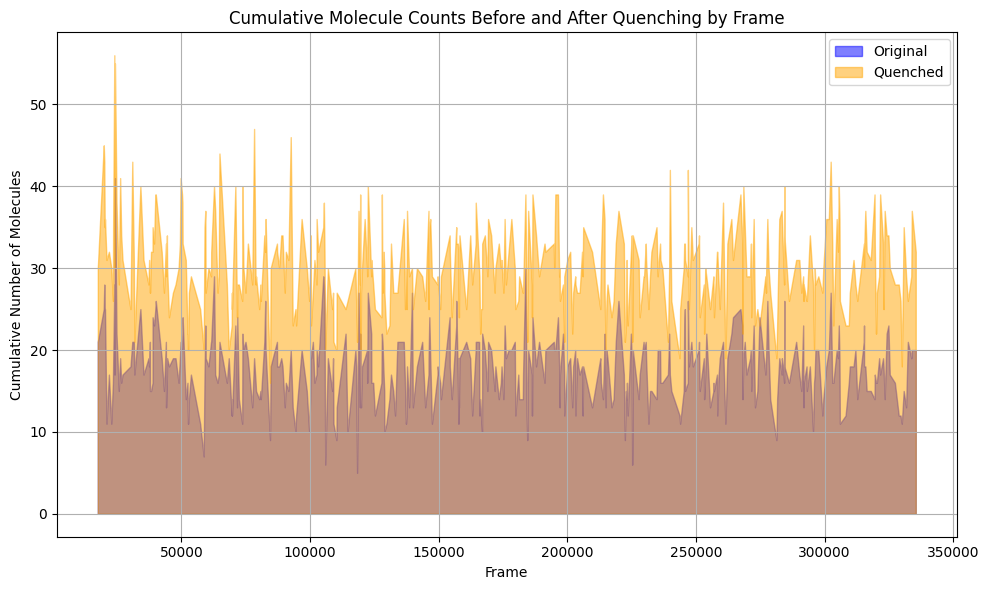

In [28]:
plt.figure(figsize=(10, 6))

plt.fill_between(original_frame_counts.index, original_frame_counts.values, color='blue', alpha=0.5, label='Original')
plt.fill_between(quenched_frame_counts.index, quenched_frame_counts.values, color='orange', alpha=0.5, label='Quenched')

plt.xlabel('Frame')
plt.ylabel('Cumulative Number of Molecules')
plt.title('Cumulative Molecule Counts Before and After Quenching by Frame')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


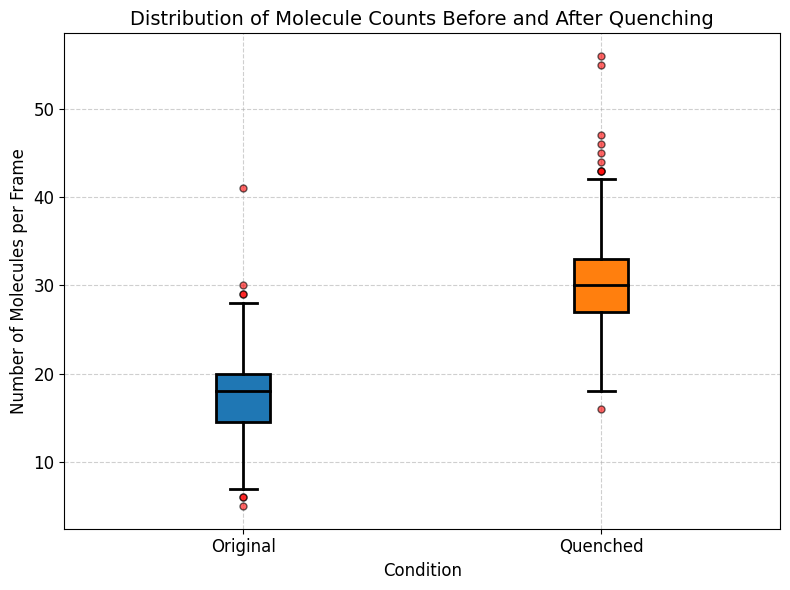

In [31]:
df_original = pd.DataFrame({'Counts': original_frame_counts.values, 'Condition': 'Original'})
df_quenched = pd.DataFrame({'Counts': quenched_frame_counts.values, 'Condition': 'Quenched'})

df_combined = pd.concat([df_original, df_quenched])

plt.figure(figsize=(8, 6))

data = [df_combined[df_combined['Condition'] == 'Original']['Counts'],
        df_combined[df_combined['Condition'] == 'Quenched']['Counts']]

box = plt.boxplot(data,
                  patch_artist=True,  # Enable custom colors
                  labels=['Original', 'Quenched'],  # Add labels
                  medianprops={'color': 'black', 'linewidth': 2},  # Style median line
                  whiskerprops={'linewidth': 2},  # Style whiskers
                  boxprops={'linewidth': 2},  # Style box border
                  capprops={'linewidth': 2},  # Style caps
                  flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'red', 'alpha': 0.6})  # Style outliers

colors = ['#1f77b4', '#ff7f0e']  # Blue for Original, Orange for Quenched
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add data points (scatter) for better visibility
#for i, group in enumerate(data):
#    y = group
#    x = [i + 1] * len(y)  # Adjust x position for each category
#    plt.scatter(x, y, color='black', alpha=0.7, s=20, label=None)  # Add scatter points

plt.title('Distribution of Molecule Counts Before and After Quenching', fontsize=14)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Number of Molecules per Frame', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()
